# Cluster Analysis

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import cluster, datasets
from scipy.cluster import hierarchy

## Import data

In [2]:
# loading iris data
iris = datasets.load_iris()

# forming a dataframe
iris_df = pd.DataFrame(iris.data, columns=iris.feature_names)

# create a target column
iris_df['species'] = iris.target

# view the dataset
iris_df.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


## EDA

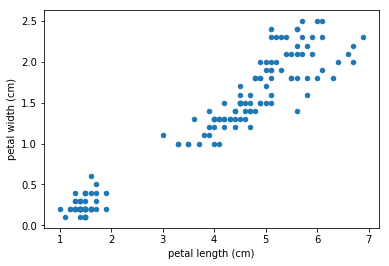

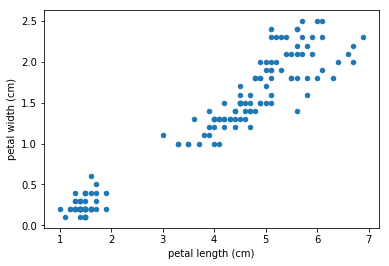

In [5]:
# map some colours in the dataset
cmap = {'0': 'r', '1': 'g', '2': 'b' }

iris_df['cspecies'] = iris_df.species.apply(lambda x: cmap[str(x)])

# viewing the data
iris_df.plot('petal length (cm)', 'petal width (cm)', kind='scatter')
iris_df.plot('petal length (cm)', 'petal width (cm)', kind='scatter')

Those are the 'real' species... what if we didn't know what they were...

In [4]:
# remove the labels
X = iris_df.drop(columns = ['species', 'cspecies'])

X.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
5,5.4,3.9,1.7,0.4
6,4.6,3.4,1.4,0.3
7,5.0,3.4,1.5,0.2
8,4.4,2.9,1.4,0.2
9,4.9,3.1,1.5,0.1


## Clustering

### k-means

In [32]:
# set the method at a given k
km = cluster.KMeans(n_clusters = 4)

Let's run the clustering

In [33]:
# kmeans meets the data!
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

Let's take a look at result!

In [34]:
# cluster labels
km.labels_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 0, 2, 0, 2, 0, 2, 0, 2, 2, 2, 2, 0, 2, 0,
       2, 2, 0, 2, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 0, 2, 0, 0, 0,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 3, 0, 3, 3, 3, 3, 2, 3, 3, 3,
       0, 0, 3, 0, 0, 3, 3, 3, 3, 0, 3, 0, 3, 0, 3, 3, 0, 0, 3, 3, 3, 3,
       3, 0, 0, 3, 3, 3, 0, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 0], dtype=int32)

## Validation

In [35]:
# add the cluster labels to the data set
validate = X.copy()

validate['km_clusters'] = km.labels_

validate.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),km_clusters
0,5.1,3.5,1.4,0.2,1
1,4.9,3.0,1.4,0.2,1
2,4.7,3.2,1.3,0.2,1
3,4.6,3.1,1.5,0.2,1
4,5.0,3.6,1.4,0.2,1
5,5.4,3.9,1.7,0.4,1
6,4.6,3.4,1.4,0.3,1
7,5.0,3.4,1.5,0.2,1
8,4.4,2.9,1.4,0.2,1
9,4.9,3.1,1.5,0.1,1


In [36]:
# map some colours (change depending on how many clusters you choose...)
cclus = {'0': 'r', '1': 'g', '2': 'b', '3': 'y', '4': 'o'}

validate['ckm_clusters'] = validate.km_clusters.apply(lambda x: cclus[str(x)]) 

validate.head(10)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),km_clusters,ckm_clusters
0,5.1,3.5,1.4,0.2,1,g
1,4.9,3.0,1.4,0.2,1,g
2,4.7,3.2,1.3,0.2,1,g
3,4.6,3.1,1.5,0.2,1,g
4,5.0,3.6,1.4,0.2,1,g
5,5.4,3.9,1.7,0.4,1,g
6,4.6,3.4,1.4,0.3,1,g
7,5.0,3.4,1.5,0.2,1,g
8,4.4,2.9,1.4,0.2,1,g
9,4.9,3.1,1.5,0.1,1,g


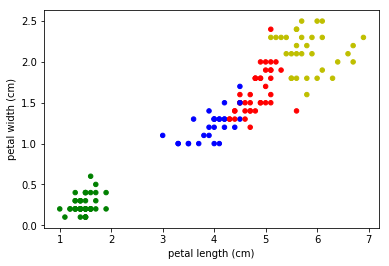

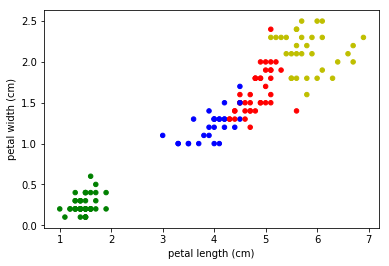

In [37]:
# viewing the data
validate.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=validate.ckm_clusters)
validate.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=validate.ckm_clusters)

## Hierarchical clustering

Hierarchical clustering using Ward's Method

In [ ]:
# get set
hc = cluster.AgglomerativeClustering(n_clusters = 4)

In [ ]:
# fit
hc.fit(X)

In [ ]:
# clusters
hc.labels_

In [ ]:
# adding the resulting clusters
validate['hc_clusters'] = hc.labels_

validate.head(10)

In [ ]:
# map some colours (change depending on how many clusters you choose...)
validate['chc_clusters'] = validate.hc_clusters.apply(lambda x: cclus[str(x)]) 

validate.head(10)

In [ ]:
# viewing the data
validate.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=validate.chc_clusters)
validate.plot('petal length (cm)', 'petal width (cm)', kind='scatter', c=validate.chc_clusters)

Now up to you... try the DBSCAN method!